## Your Project

This notebook is meant to copied as used as a simple start for a pallets experiment. Ideally, it will reduce the time it takes to go from idea to working experiment.

In [1]:
import sys
import os
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt


In [2]:
# Load pallets library

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))  # uncomment to run nb from 'pallets/nb'
# sys.path.append(os.path.abspath(os.getcwd()))                    # uncomment to run from project root

from pallets import images as I, datasets as DS, models as M


In [3]:
# To GPU, or not to GPU

device = M.get_device(require_gpu=True)


## Single Punk

image shape: torch.Size([4, 24, 24])



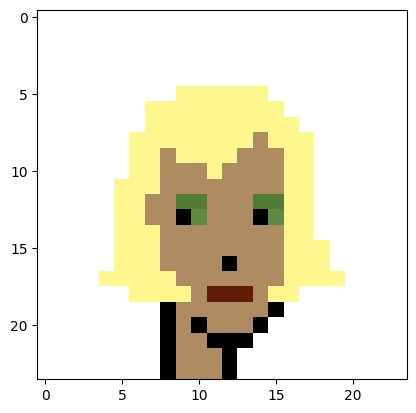

In [4]:
image = I.get_punk_tensor(0)
print(f"image shape: {image.shape}\n")

pil_image = to_pil_image(image)
plt.imshow(pil_image)
plt.show()


## Prepare Data Loaders

In [4]:
# RGBA
# dataset = DS.CPunksDataset(device=device, test_size=2000)

# One Hot
all_colors = I.get_punk_colors()
mapper = DS.ColorOneHotMapper(all_colors)
dataset = DS.OneHotEncodedImageDataset(mapper, device=device, test_size=2000)


In [5]:
batch_size = 32

train_sampler = SubsetRandomSampler(dataset.train_idx)
test_sampler = SubsetRandomSampler(dataset.test_idx)

train_loader = DataLoader(
    dataset, batch_size=batch_size, sampler=train_sampler,
)
test_loader = DataLoader(
    dataset, batch_size=batch_size, sampler=test_sampler,
)
